## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [5]:
x = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

## Print count of each label in Purchased column

In [6]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [7]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

## Train the model with random_state = 0

In [9]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()

In [10]:
lgmodel.fit(x_train,y_train)

LogisticRegression()

In [11]:
lgpre= lgmodel.predict(x_test)

## Print the prediction results

In [12]:
lgpre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [13]:
df1 = x_test.copy()
df1['Actual Purchased'] = y_test
df1['Predict Purchased'] = lgpre
df1

,Age,EstimatedSalary,Actual Purchased,Predict Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [14]:
ch = (df1['Actual Purchased'] == df1['Predict Purchased'])
ch.value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
confusion_matrix(y_test,lgpre)

array([[68,  0],
       [32,  0]], dtype=int64)

In [17]:
print(classification_report(y_test,lgpre))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



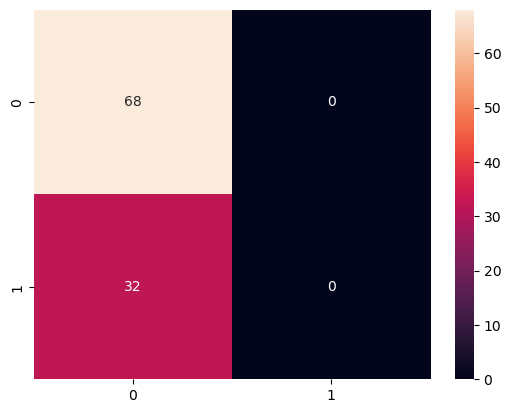

In [28]:
lg_cm = confusion_matrix(y_test, lgpre)
sns.heatmap(lg_cm, annot = True);

## Use StandardScaler() to improved performance and re-train your model

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler                    

In [20]:
pip = make_pipeline(StandardScaler(),
                     LogisticRegression())
pip.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
prs= pip.predict(x_test)

In [22]:
print(classification_report(y_test,prs))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [23]:
v1= [[30,90000]]
pip.predict(v1)

array([0], dtype=int64)

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [24]:
v2= [[40,90000]]
pip.predict(v2)

array([1], dtype=int64)